<a href="https://colab.research.google.com/github/Dylan2211/Colab_CVNL/blob/main/Week03_NeuralNetworksII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import *
from idlmam import *


/content/drive/My Drive/Colab Notebooks/idlmam.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
def train_simple_network(model, loss_func, training_loader, \
                         epochs=20, device="cpu"):
  #Yellow step is done here. Creates the optimizer and moves the model
  #to compute device. SGD in the stochastic descent over the parameters
  optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

  #places the model on the correct compute resource
  model.to(device)

  #The nested loop handle the red steps, iterating through all data (batches)
  #multiple times (epochs)
  for epoch in tqdm(range(epochs), desc="Epoch"):

    model = model.train() #Puts our model in training mode
    running_loss = 0.0

    for inputs, labels in tqdm(training_loader, desc="Batch", leave=False):
      #Moves the batch of data to the device we are using.
      #This is the last red step.
      inputs = moveTo(inputs, device)
      labels = moveTo(labels, device)

      #First a yellow step: prepare the optimizer. Most PyTorch code
      #does this first to make sure everything is in a clean and
      #ready state. PyTorch stores gradients in a mutable data
      #structure, so we need to set it to a clean state before we use it.
      #Otherwise, it will have old information from a previous iteration.
      optimizer.zero_grad()

      #This line and the next perform the steps in blue section.
      y_hat = model(inputs)

      loss = loss_func(y_hat, labels)

      #The remaining two yellow steps compute the gradient and
      #“.step()” the optimizer. The call on this line computes
      #the gradient due to the parameters.
      loss.backward()

      optimizer.step() # Updates all the parameters

      running_loss += loss.item()#grabs information that we would like to have

<Axes: >

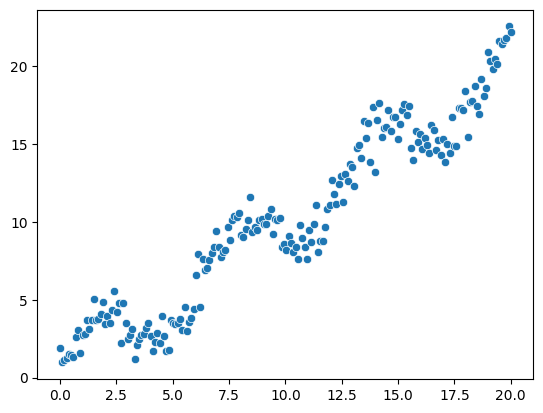

In [ ]:
X = np.linspace(0, 20, num=200) #Creates one-dimensional input
y = X + np.sin(X)*2 + np.random.normal(size=X.shape) #Creates output
sns.scatterplot(x=X, y=y)


In [ ]:
class Simple1DRegressionDataset(Dataset):

  def __init__(self, X, y):
    super(Simple1DRegressionDataset, self).__init__()
    self.X = X.reshape(-1,1)
    self.y = y.reshape(-1,1)

  def __getitem__(self, index):
    return torch.tensor(self.X[index,:], dtype=torch.float32),\
    torch.tensor(self.y[index], dtype=torch.float32)

  def __len__(self):
    return self.X.shape[0]

training_loader = DataLoader(Simple1DRegressionDataset(X, y), shuffle=True)


In [ ]:
in_features = 1
out_features = 1
model = nn.Linear(in_features, out_features)
loss_func = nn.MSELoss()
device = torch.device("cuda")

train_simple_network(model, loss_func, training_loader, device=device)


Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

<Axes: >

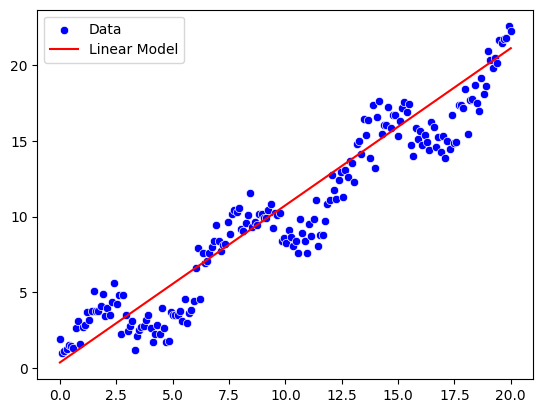

In [ ]:
with torch.no_grad():
  Y_pred = model(torch.tensor(X.reshape(-1,1), device=device,\
                              dtype=torch.float32)).cpu().numpy()

#The data
sns.scatterplot(x=X, y=y, color='blue', label='Data')
#What the model learnt
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Linear Model')


In [ ]:
model = nn.Sequential( #Input “layer” is implicitly the input.
nn.Linear(1, 10), #Hidden layer
nn.Linear(10, 1), #Output layer
)

train_simple_network(model, loss_func, training_loader)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

<Axes: >

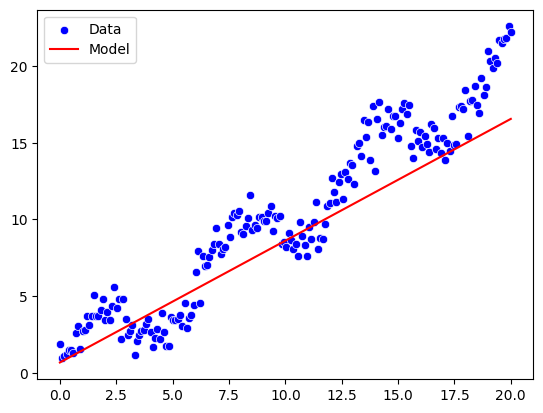

In [ ]:
with torch.no_grad():
  #Shape of (N, 1)
  Y_pred = model(torch.tensor(X.reshape(-1,1), \
                              dtype=torch.float32)).cpu().numpy()

#The data
sns.scatterplot(x=X, y=y, color='blue', label='Data')
#What our model learned
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Model')


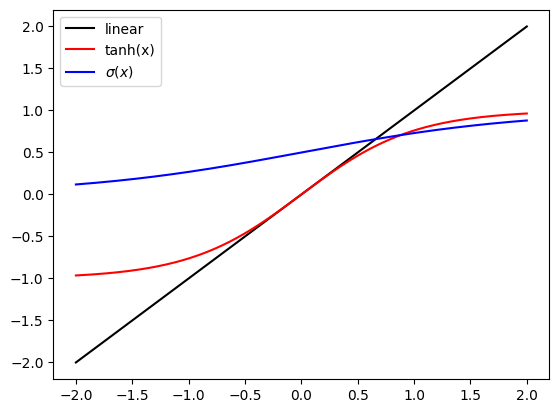

In [ ]:
activation_input = np.linspace(-2, 2, num=200)

tanh_activation = np.tanh(activation_input)
sigmoid_activation = np.exp(activation_input)/(np.exp(activation_input)+1)

sns.lineplot(x=activation_input, y=activation_input, \
             color='black', label="linear")
sns.lineplot(x=activation_input, y=tanh_activation, \
             color='red', label="tanh(x)")
ax = sns.lineplot(x=activation_input, y=sigmoid_activation, \
                  color='blue', label="$σ(x)$")


Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

<Axes: >

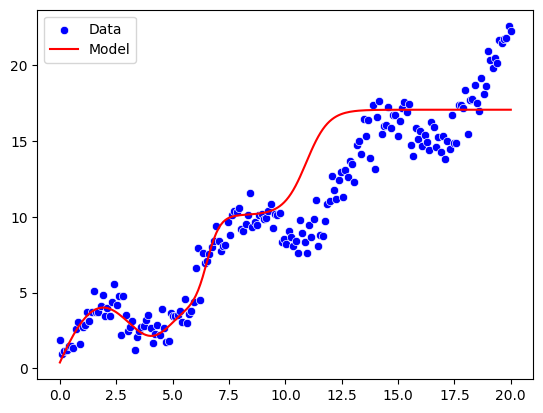

In [ ]:
#Define and train the model
model = nn.Sequential(
  nn.Linear(1, 10), #Hidden layer
  nn.Tanh(), #Activation
  nn.Linear(10, 1), #Output layer
)
train_simple_network(model, loss_func, training_loader, epochs=200)

#Inference
with torch.no_grad():
  Y_pred = model(torch.tensor(X.reshape(-1,1),\
                              dtype=torch.float32)).cpu().numpy()
#The data
sns.scatterplot(x=X, y=y, color='blue', label='Data')
#What our model learned
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Model')



<Axes: >

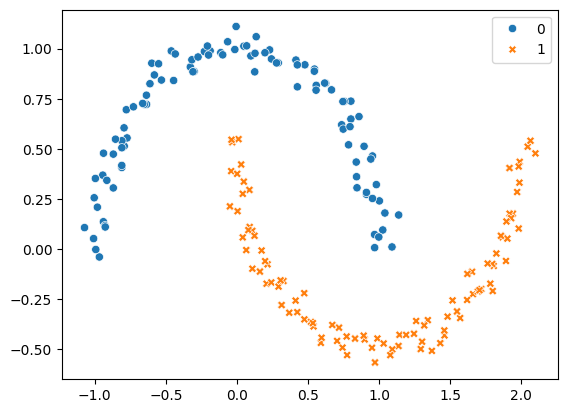

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y)


In [ ]:
classification_dataset = \
torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), \
                               torch.tensor(y, dtype=torch.long))

training_loader = DataLoader(classification_dataset)



In [ ]:
in_features = 2
out_features = 2
model = nn.Linear(in_features, out_features)


In [ ]:
loss_func = nn.CrossEntropyLoss()
train_simple_network(model, loss_func, training_loader, epochs=50)



Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

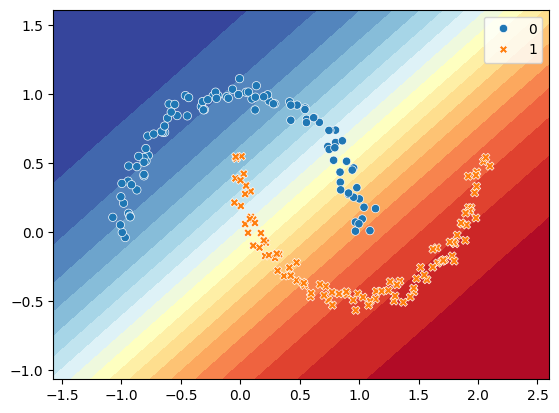

In [ ]:
def visualize2DSoftmax(X, y, model, title=None):
  x_min = np.min(X[:,0])-0.5
  x_max = np.max(X[:,0])+0.5
  y_min = np.min(X[:,1])-0.5
  y_max = np.max(X[:,1])+0.5

  xv, yv = np.meshgrid(np.linspace(x_min, x_max, num=20),\
                       np.linspace(y_min, y_max, num=20), indexing='ij')
  xy_v = np.hstack((xv.reshape(-1,1), yv.reshape(-1,1)))

  with torch.no_grad():
    logits = model(torch.tensor(xy_v, dtype=torch.float32))
    y_hat = F.softmax(logits, dim=1).numpy()

  cs = plt.contourf(xv, yv, y_hat[:,0].reshape(20,20),\
                    levels=np.linspace(0,1,num=20), cmap=plt.cm.RdYlBu)
  ax = plt.gca()
  sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax)

  if title is not None:
    ax.set_title(title)

visualize2DSoftmax(X, y, model)



In [ ]:
model = nn.Sequential(
nn.Linear(2, 30),
nn.Tanh(),
nn.Linear(30, 30),
nn.Tanh(),
nn.Linear(30, 2),
)

train_simple_network(model, loss_func, training_loader, epochs=250)

Epoch:   0%|          | 0/250 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

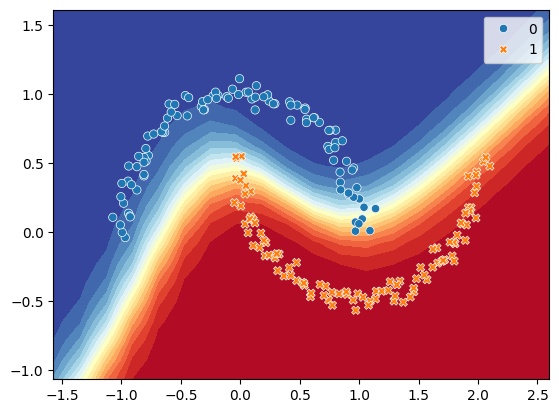

In [ ]:
visualize2DSoftmax(X, y, model)